# Exercise 31 - Parabolic Models with Linear Regression
The moving average of the land temperature measurements seems to have parabolic features.  To incorporate these paraboloic features into the model we need to add a squared term. Remember the equation of a parabola can be defined as:

$$y = ax^2 + mx + c$$



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

Reload the data from the previous exercise

In [2]:
df = pd.read_csv('synth_temp.csv')
df = df.loc[df.Year > 1901]
df_group_year = df.groupby('Year').agg(np.mean)

# Moving average
window = 10
rolling = df_group_year.AverageTemperature.rolling(window).mean();

df_group_year['Year'] = df_group_year.index

model = LinearRegression()

In [3]:
df_group_year['Year'] = df_group_year.index
df_group_year['Year2'] = df_group_year.index ** 2
df_group_year.head()

,AverageTemperature,Year,Year2
Year,,,
1902,17.438122,1902,3617604
1903,17.375456,1903,3621409
1904,17.558674,1904,3625216
1905,17.740646,1905,3629025
1906,17.501770,1906,3632836


In [4]:
df_group_year[['Year', 'Year2']]

,Year,Year2
Year,,
1902,1902,3617604
1903,1903,3621409
1904,1904,3625216
1905,1905,3629025
1906,1906,3632836
1907,1907,3636649
1908,1908,3640464
1909,1909,3644281
1910,1910,3648100


In [5]:
# Note the year values need to be provided as an N x 1 array
model.fit(df_group_year[['Year2', 'Year']], df_group_year.AverageTemperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Print the parameters of the model

In [6]:
print(f'a = {model.coef_[0]}')
print(f'm = {model.coef_[1]}')
print(f'c = {model.intercept_}')

print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x^2 + {model.coef_[1]:0.4}x + {model.intercept_:0.4f}')

a = 0.0002814670724607414
m = -1.0779527266284135
c = 1049.5159662796232

Model Definition
y = 0.0002815x^2 + -1.078x + 1049.5160


In [7]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_group_year[['Year2', 'Year']], df_group_year.AverageTemperature)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.9627


In [8]:
# Use linspace to get a range of values, in 20 yr increments
x = np.linspace(df_group_year['Year'].min(), df_group_year['Year'].max(), 20)
x

array([1902.        , 1907.68421053, 1913.36842105, 1919.05263158,
       1924.73684211, 1930.42105263, 1936.10526316, 1941.78947368,
       1947.47368421, 1953.15789474, 1958.84210526, 1964.52631579,
       1970.21052632, 1975.89473684, 1981.57894737, 1987.26315789,
       1992.94736842, 1998.63157895, 2004.31578947, 2010.        ])

In [9]:
trend_x = np.zeros((20, 2))
trend_x[:,0] = x ** 2 # Assign to the first column
trend_x[:,1] = x # Assign to the second column 
trend_x

array([[3.61760400e+06, 1.90200000e+03],
       [3.63925905e+06, 1.90768421e+03],
       [3.66097871e+06, 1.91336842e+03],
       [3.68276300e+06, 1.91905263e+03],
       [3.70461191e+06, 1.92473684e+03],
       [3.72652544e+06, 1.93042105e+03],
       [3.74850359e+06, 1.93610526e+03],
       [3.77054636e+06, 1.94178947e+03],
       [3.79265375e+06, 1.94747368e+03],
       [3.81482576e+06, 1.95315789e+03],
       [3.83706239e+06, 1.95884211e+03],
       [3.85936365e+06, 1.96452632e+03],
       [3.88172952e+06, 1.97021053e+03],
       [3.90416001e+06, 1.97589474e+03],
       [3.92665512e+06, 1.98157895e+03],
       [3.94921486e+06, 1.98726316e+03],
       [3.97183921e+06, 1.99294737e+03],
       [3.99452819e+06, 1.99863158e+03],
       [4.01728178e+06, 2.00431579e+03],
       [4.04010000e+06, 2.01000000e+03]])

In [10]:
trend_y = model.predict(trend_x)
trend_y

array([17.48628743, 17.45415991, 17.44022092, 17.44447048, 17.46690858,
       17.50753523, 17.56635041, 17.64335414, 17.73854641, 17.85192723,
       17.98349658, 18.13325448, 18.30120092, 18.48733591, 18.69165943,
       18.9141715 , 19.15487211, 19.41376127, 19.69083897, 19.98610521])

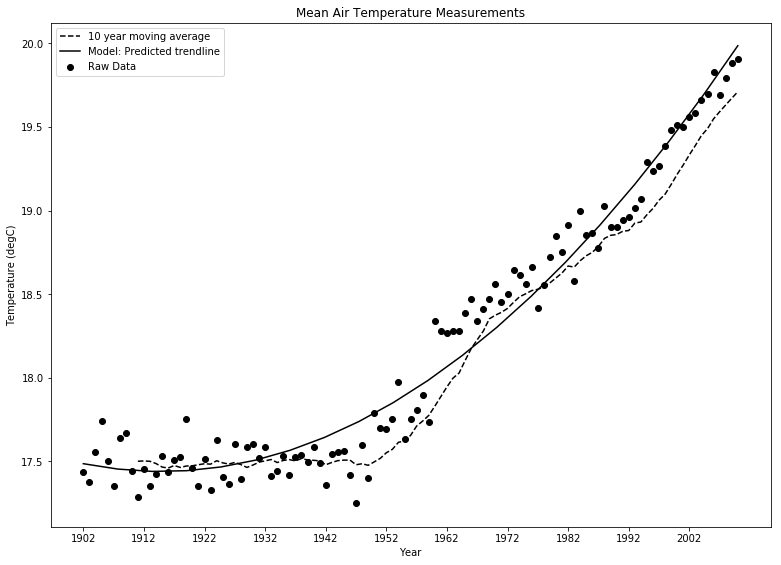

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--', label=f'{window} year moving average');
ax.plot(trend_x[:,1], trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();

In [12]:
model.coef_

array([ 2.81467072e-04, -1.07795273e+00])